# t-SNE on the Pima Indians Diabetes Dataset

This notebook walks through an end-to-end example using t-SNE for visualization of the Pima Indians Diabetes dataset. It includes data download (from a URL), preprocessing, parameter exploration for t-SNE, visualization, and optional clustering/evaluation.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Matplotlib: each plot will be drawn in its own figure. No seaborn, no explicit color settings (use defaults).


In [6]:
# 2) Download dataset from URL and load into pandas
# The notebook will download the dataset at runtime using this URL. If your environment blocks downloads, replace this with a local path.

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# Column names from the UCI repository
column_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

# Read CSV directly from the URL. When you run this notebook locally this cell will attempt to fetch the CSV from the web.
try:
    df = pd.read_csv(url, header=None, names=column_names)
    print('Downloaded dataset, shape:', df.shape)
    display(df.head())
except Exception as e:
    print('Could not download the dataset in this environment. If you are offline, download the CSV manually and put it next to this notebook. Error:', e)
    # Create an empty placeholder so the rest of the notebook doesn't crash during static inspection
    df = pd.DataFrame(columns=column_names)

Downloaded dataset, shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 3) Quick data checks and preprocessing
# Replace zero-values in certain columns with NaN (these columns shouldn't be zero in practice)
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_with_zeros:
    df[c] = df[c].replace(0, np.nan)

print('Missing values per column:')
print(df.isna().sum())

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])

print('\nAfter imputation, missing values per column:')
print(df.isna().sum())

# Features and target
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
print('\nX shape:', X.shape, 'y shape:', y.shape)


Missing values per column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After imputation, missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

X shape: (768, 8) y shape: (768,)


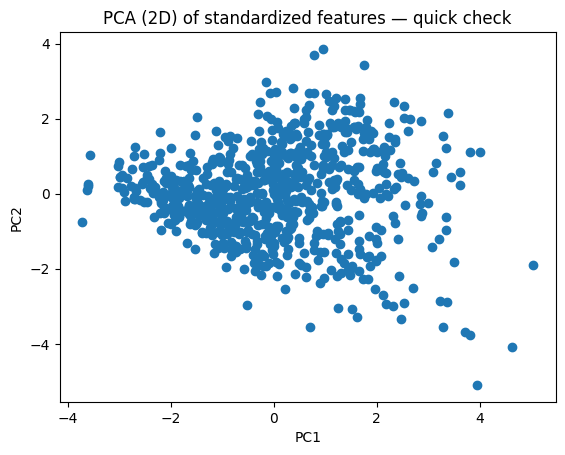

In [8]:
# 4) Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: compare PCA projection (2D) to get a quick sense
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('PCA (2D) of standardized features — quick check')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


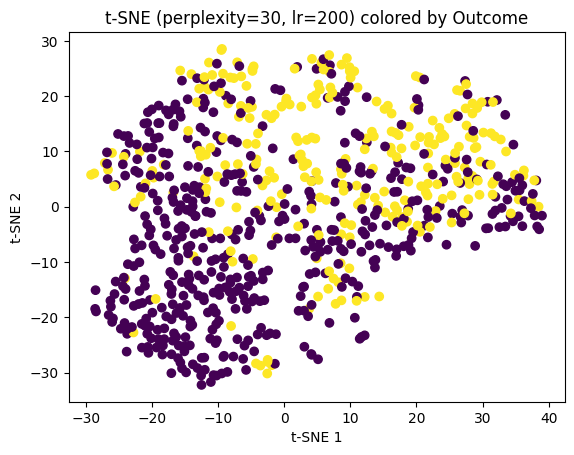

In [9]:
# 5) t-SNE: single run (baseline)
# Important t-SNE parameters to try: perplexity (5-50), learning_rate (10-1000), n_iter (>= 500, often 1000+)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=0, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.title('t-SNE (perplexity=30, lr=200) colored by Outcome')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


Running t-SNE: perplexity=5, lr=50


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


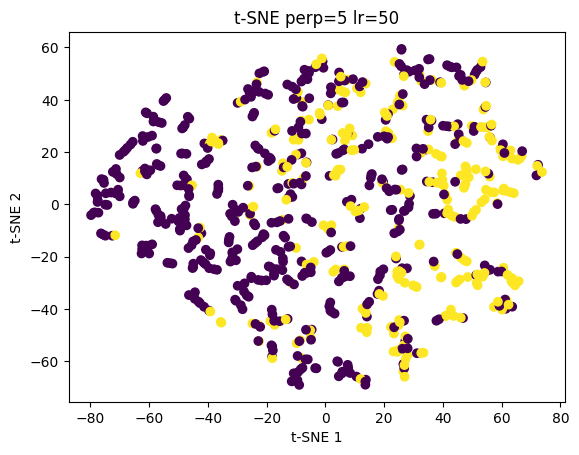

Running t-SNE: perplexity=5, lr=200


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


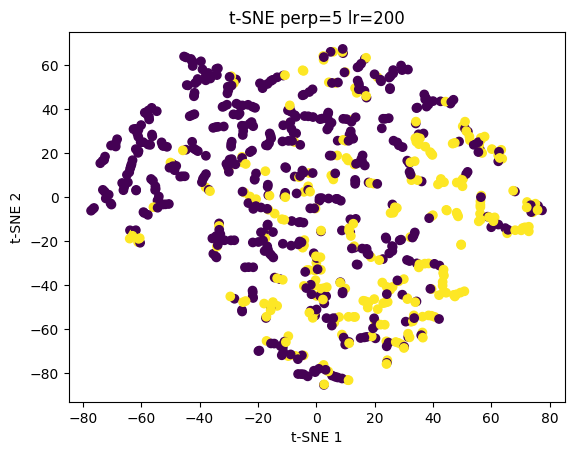

Running t-SNE: perplexity=5, lr=500


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


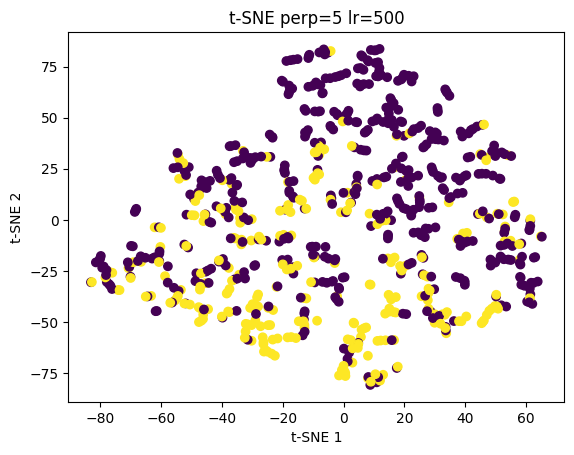

Running t-SNE: perplexity=15, lr=50


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


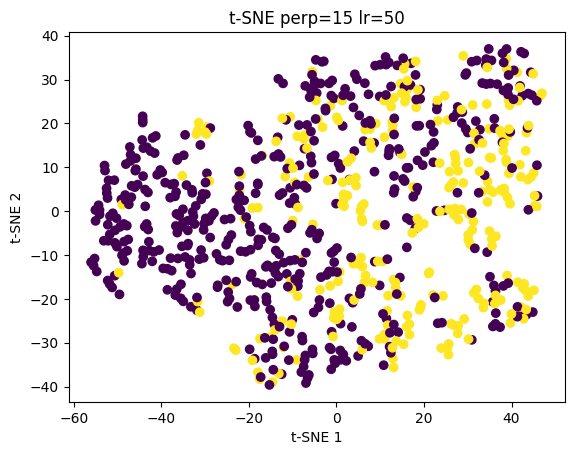

Running t-SNE: perplexity=15, lr=200


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


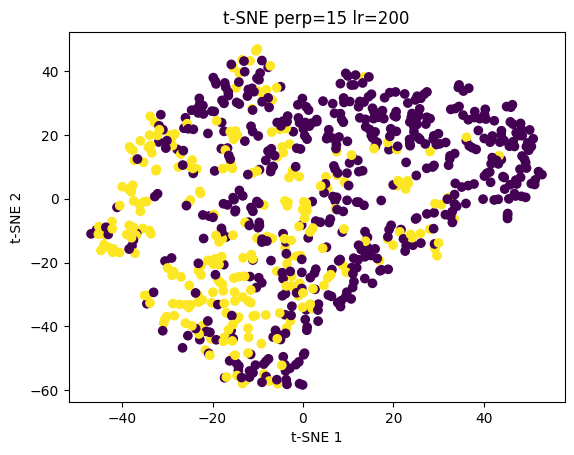

Running t-SNE: perplexity=15, lr=500


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


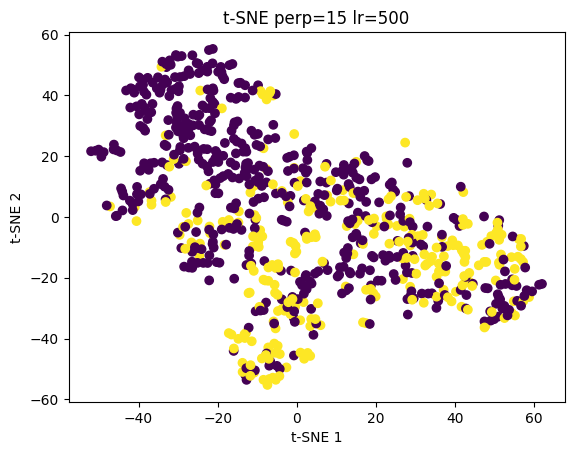

Running t-SNE: perplexity=30, lr=50


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


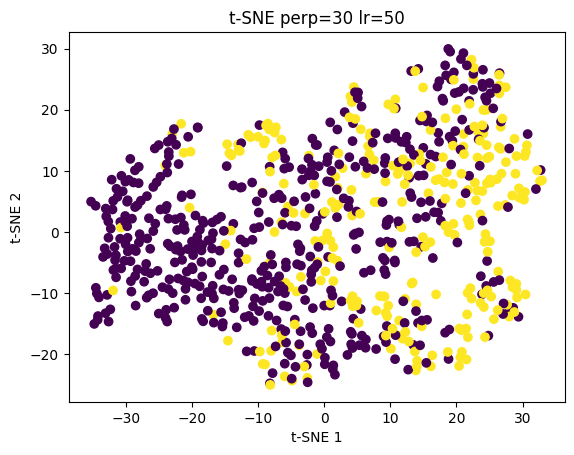

Running t-SNE: perplexity=30, lr=200


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


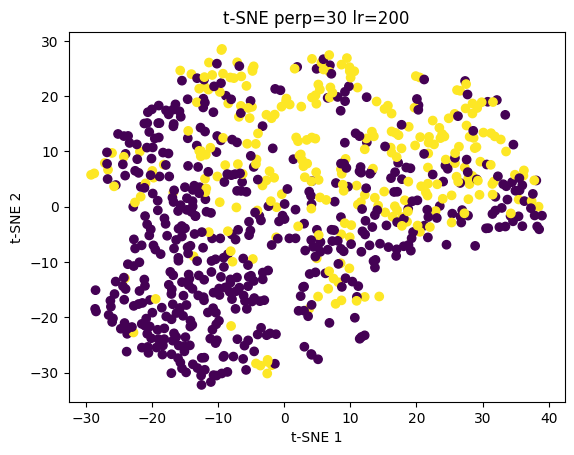

Running t-SNE: perplexity=30, lr=500


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


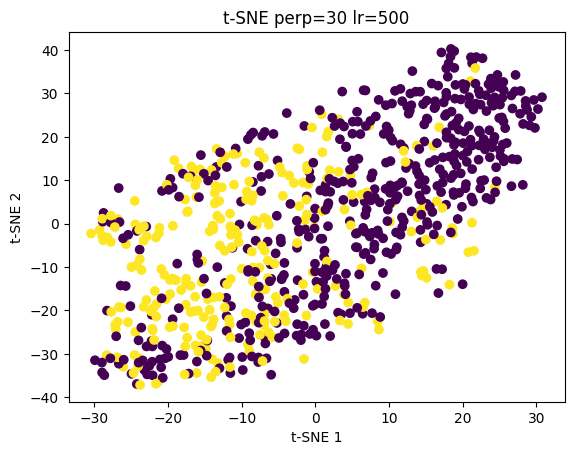

Running t-SNE: perplexity=50, lr=50


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


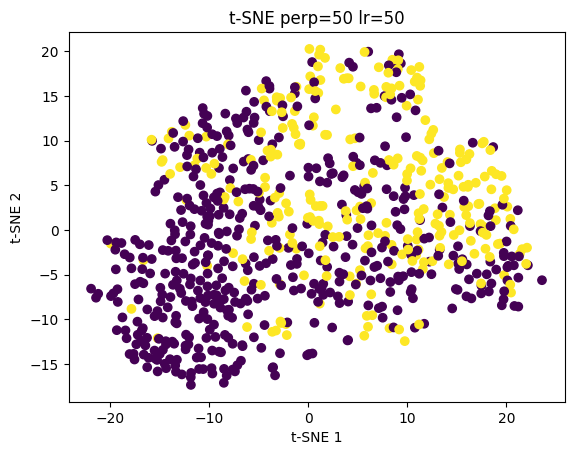

Running t-SNE: perplexity=50, lr=200


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


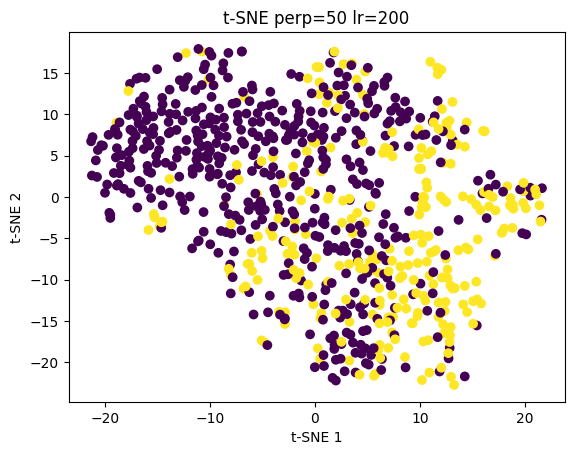

Running t-SNE: perplexity=50, lr=500


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


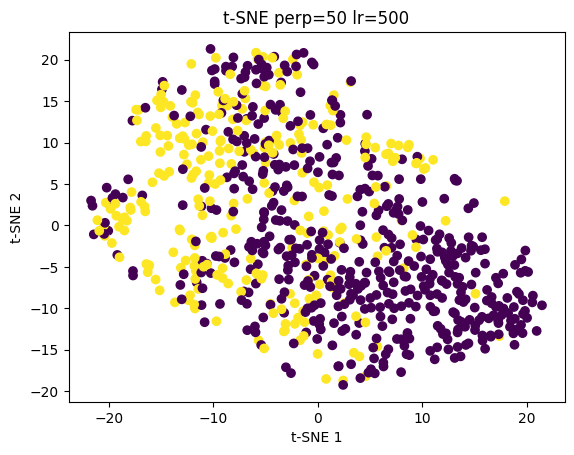

Completed parameter sweep — results stored in `results` dict (you can further inspect or save them).


In [10]:
# 6) t-SNE parameter sweep (multiple perplexities and learning rates)
perplexities = [5, 15, 30, 50]
learning_rates = [50, 200, 500]
results = {}

for perp in perplexities:
    for lr in learning_rates:
        print(f'Running t-SNE: perplexity={perp}, lr={lr}')
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, n_iter=1000, random_state=0, init='pca')
        X_t = tsne.fit_transform(X_scaled)
        key = f'p{perp}_lr{lr}'
        results[key] = X_t
        plt.figure()
        plt.scatter(X_t[:,0], X_t[:,1], c=y)
        plt.title(f't-SNE perp={perp} lr={lr}')
        plt.xlabel('t-SNE 1')
        plt.ylabel('t-SNE 2')
        plt.show()

print('Completed parameter sweep — results stored in `results` dict (you can further inspect or save them).')


In [11]:
# 7) Optional: clustering on t-SNE coordinates + evaluation
# We'll run KMeans on the baseline t-SNE embedding and compute silhouette (note: silhouette on t-SNE coords is heuristic)
from sklearn.metrics import silhouette_score

for k in [2,3]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    lbls = kmeans.fit_predict(X_tsne)
    sil = silhouette_score(X_tsne, lbls)
    print(f'KMeans k={k}, silhouette on t-SNE coords: {sil:.4f}')

# Compare KMeans on original standardized features as well
for k in [2,3]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    lbls = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, lbls)
    print(f'KMeans k={k}, silhouette on standardized features: {sil:.4f}')


KMeans k=2, silhouette on t-SNE coords: 0.4203
KMeans k=3, silhouette on t-SNE coords: 0.4439
KMeans k=2, silhouette on standardized features: 0.1963
KMeans k=3, silhouette on standardized features: 0.1950


In [12]:
# 8) Save embeddings and figures (optional)
# Example: save baseline t-SNE embedding to CSV
import os
out_dir = 'pima_tsne_outputs'
os.makedirs(out_dir, exist_ok=True)
# Save the last computed baseline embedding (X_tsne) if dataset was loaded
try:
    if X_tsne is not None and X_tsne.shape[0] == X.shape[0]:
        emb_df = pd.DataFrame(X_tsne, columns=['TSNE1','TSNE2'])
        emb_df['Outcome'] = y
        emb_df.to_csv(os.path.join(out_dir, 'pima_tsne_baseline.csv'), index=False)
        print('Saved baseline embedding to', os.path.join(out_dir, 'pima_tsne_baseline.csv'))
    else:
        print('Baseline embedding not available to save — did download/load fail?')
except NameError:
    print('Variables not defined — likely dataset download failed in this environment.')


Saved baseline embedding to pima_tsne_outputs/pima_tsne_baseline.csv
